In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!pip install bs4

from bs4 import BeautifulSoup

You should consider upgrading via the 'c:\users\axew2\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\axew2\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Take the URL from wiki to start Wrapping the data

In [2]:
url = 'https://en.wikipedia.org/wiki/Arrondissements_of_Paris'

In [3]:
data = requests.get(url).text

Use the Beautiful Soup Library to take the Table about Arrondissement of Paris from Wikipeadia

In [4]:
soup = BeautifulSoup(data, "html.parser")

In [5]:
table_contents=[]
table=soup.find_all('table')[1]
for row in table.findAll('tr'):
    cell = {}
    if len(row.text.split('\n')) == 15:
        pass
    else:
        cell['Arrondissement'] = row.text.split('\n')[1]
        cell['Name'] = row.text.split('\n')[2]
        
        if len(row.text.split('\n')) <= 5:
            cell['Area'] = table.findAll('tr')[1].text.split('\n')[3].replace(u'\xa0', u' ')[:4]
            cell['Population'] = table.findAll('tr')[1].text.split('\n')[4]
            cell['Density'] = table.findAll('tr')[1].text.split('\n')[5]
         
        else:
            cell['Area'] = row.text.split('\n')[3].replace(u'\xa0', u' ')[:4]
            cell['Population'] = row.text.split('\n')[4]
            cell['Density'] = row.text.split('\n')[5]
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)


In [6]:
df['Density'] = df['Density'].apply(lambda x: x.replace(',','.'))

In [7]:
df['Density'] = df['Density'].replace(['8.657¹21.729²','9.169³19.0544'],['21.729','19.0544'])

Because Density of Reuilly , Passy have 2 value with Bois de Vincennes and without it so we use density without  Bois de Vincennes

In [8]:
df

,Arrondissement,Name,Area,Population,Density
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59,"100,196",17.924
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59,"100,196",17.924
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59,"100,196",17.924
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59,"100,196",17.924
4,5th (Ve) L,Panthéon,2.54,"59,631",23.477
5,6th (VIe) L,Luxembourg,2.15,"41,976",19.524
6,7th (VIIe) L,Palais-Bourbon,4.08,"52,193",12.761
7,8th (VIIIe) R,Élysée,3.88,"37,368",9.631
8,9th (IXe) R,Opéra,2.17,"60,071",27.556
9,10th (Xe) R,Entrepôt,2.89,"90,836",31.431


In [9]:
!pip install geocoder

You should consider upgrading via the 'c:\users\axew2\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [10]:
import geocoder

I use paris_coordinate to take Latitude and Longitude of each Arrondissement in Paris

In [11]:
data = pd.read_excel('Paris_Coordinate.xlsx', header = None)
data.columns = ['Latitude','Longitude']

In [12]:
data['Latitude'] = data['Latitude'].apply(lambda x: x.split(';')[-1])
data['Longitude'] = data['Longitude'].apply(lambda x: x.split(';')[0])

In [13]:
data.head()

,Latitude,Longitude
0,48.8400853759,2.29282582242
1,48.8491303586,2.33289799905
2,48.8283880317,2.36227244042
3,48.8444431505,2.35071460958
4,48.8727208374,2.3125540224


In [14]:
new_data = pd.concat([df,data],axis =1)

In [15]:
new_data.head()

,Arrondissement,Name,Area,Population,Density,Latitude,Longitude
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59,"100,196",17.924,48.8400853759,2.29282582242
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59,"100,196",17.924,48.8491303586,2.33289799905
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59,"100,196",17.924,48.8283880317,2.36227244042
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59,"100,196",17.924,48.8444431505,2.35071460958
4,5th (Ve) L,Panthéon,2.54,"59,631",23.477,48.8727208374,2.3125540224


In [16]:
paris_data = new_data

Rename the columns Name with Neighbor

In [17]:
paris_data.rename(columns = {'Name': 'Neighbor'}, inplace = True)

In [18]:
address = 'Paris, France'

geolocator = Nominatim(user_agent="fr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris City are 48.8566969, 2.3514616.


Take the Latitude and Longitude of Paris and generate maps to visualize the Arrondissement in Paris

In [19]:
map_paris = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Arrondissement'], 
                                           paris_data['Neighbor']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

There 20 Arrondissment in Paris

In [20]:
CLIENT_ID = 'HSXLXVHWZWBXY0R1DTY50VWZDCDHQ3YCIJRZ5ZTCM5XXEVWR' #  Foursquare ID
CLIENT_SECRET = 'BLVQCC40KCDBSXBE5TFC1Y2R1OXFW41FCRBK4UHKWFEJ4ZBG' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HSXLXVHWZWBXY0R1DTY50VWZDCDHQ3YCIJRZ5ZTCM5XXEVWR
CLIENT_SECRET:BLVQCC40KCDBSXBE5TFC1Y2R1OXFW41FCRBK4UHKWFEJ4ZBG


In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name,)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
borough_venues = getNearbyVenues(names=paris_data['Neighbor'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )

Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Élysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Butte-Montmartre
Buttes-Chaumont
Ménilmontant


In [23]:
borough_venues.shape

(1248, 7)

Lets check how many venues per neighborhood

In [24]:
borough_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Batignolles-Monceau,67,67,67,67,67,67
Bourse,44,44,44,44,44,44
Butte-Montmartre,81,81,81,81,81,81
Buttes-Chaumont,100,100,100,100,100,100
Entrepôt,100,100,100,100,100,100
Gobelins,21,21,21,21,21,21
Hôtel-de-Ville,87,87,87,87,87,87
Louvre,61,61,61,61,61,61
Luxembourg,4,4,4,4,4,4


In [25]:
print('There are {} uniques categories.'.format(len(borough_venues['Venue Category'].unique())))

There are 196 uniques categories.


In [26]:
borough_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.8400853759,2.29282582242,Le Grand Venise,48.838276,2.294484,Italian Restaurant
1,Louvre,48.8400853759,2.29282582242,Indian Villa,48.841116,2.291621,Indian Restaurant
2,Louvre,48.8400853759,2.29282582242,La Table Libanaise,48.841766,2.288607,Lebanese Restaurant
3,Louvre,48.8400853759,2.29282582242,AlKaram,48.838379,2.297156,Lebanese Restaurant
4,Louvre,48.8400853759,2.29282582242,Square Saint-Lambert,48.842343,2.297108,Park


In [27]:
borough_venues[borough_venues['Venue Category'] == 'Vietnamese Restaurant'].count()

Neighborhood              22
Neighborhood Latitude     22
Neighborhood Longitude    22
Venue                     22
Venue Latitude            22
Venue Longitude           22
Venue Category            22
dtype: int64

## Now we will analyze each neighborhood

Using one hot encoding to convert all Categories to 0 and 1

In [28]:
# one hot encoding
data_onehot = pd.get_dummies(borough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
data_onehot['Neighbor'] = borough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [data_onehot.columns[-1]] + list(data_onehot.columns[:-1])
data_onehot = data_onehot[fixed_columns]

data_onehot.head()

,Neighbor,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,Baby Store,Bagel Shop,Bakery,Bar,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Cambodian Restaurant,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Escape Room,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Store,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Resort,Restaurant,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Snack Place,Soba Restaurant,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Trail,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
data_onehot.shape

(1248, 197)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [70]:
data_grouped = data_onehot.groupby('Neighbor').mean().reset_index()
data_grouped.head()

,Neighbor,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,Baby Store,Bagel Shop,Bakery,Bar,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Cambodian Restaurant,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Escape Room,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Store,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Resort,Restaurant,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Snack Place,Soba Restaurant,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Trail,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Batignolles-Monceau,0.014925,0.0,0.000000,0.0,0.0,0.0,0.014925,0.0,0.014925,0.0,0.0,0.000000,0.044776,0.014925,0.00,0.014925,0.00,0.014925,0.0,0.0,0.014925,0.0,0.000000,0.0,0.0,0.000000,0.0,0.014925,0.00,0.000000,0.000000,0.00,0.0,0.0,0.0,0.059701,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029851,0.000000,0.00,0.014925,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0,0.00,0.000000,0.0,0.014925,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.089552,0.0,0.000000,0.000000,0.014925,0.0,0.000000,0.0,0.014925,0.00,0.014925,0.000000,0.014925,0.0,0.014925,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.0,0.00,0.00,0.00,0.00,0.044776,0.029851,0.0,0.00,0.0,0.014925,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.014925,0.0,0.0,0.014925,0.0,0.000000,0.00,0.0,0.0,0.014925,0.00,0.0,0.0,0.00,0.00,0.014925,0.0,0.0,0.0,0.000000,0.014925,0.044776,0.000000,0.014925,0.000000,0.0,0.00,0.000000,0.029851,0.000000,0.014925,0.0,0.0,0.014925,0.000000,0.0,0.059701,0.00,0.0,0.0,0.000000,0.0,0.014925,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.014925,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.059701,0.00,0.0,0.0,0.000000,

We will take Vietnamese Restaurant

In [31]:
vn_res = data_grouped[['Neighbor','Vietnamese Restaurant']]
vn_res.head()

,Neighbor,Vietnamese Restaurant
0,Batignolles-Monceau,0.029851
1,Bourse,0.000000
2,Butte-Montmartre,0.000000
3,Buttes-Chaumont,0.000000
4,Entrepôt,0.000000


# Now we will cluster the neighborhoods

 We will use k-means clustering. But first we will find the best K using the Elbow Point method.

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = vn_res.drop(['Neighbor'], axis=1)

In [33]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([2, 0, 0, 0, 0, 0, 2, 0, 0, 2])

In [34]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [72]:
scores = [get_inertia(x) for x in range(2, 10)]

C:\Users\axew2\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Error')

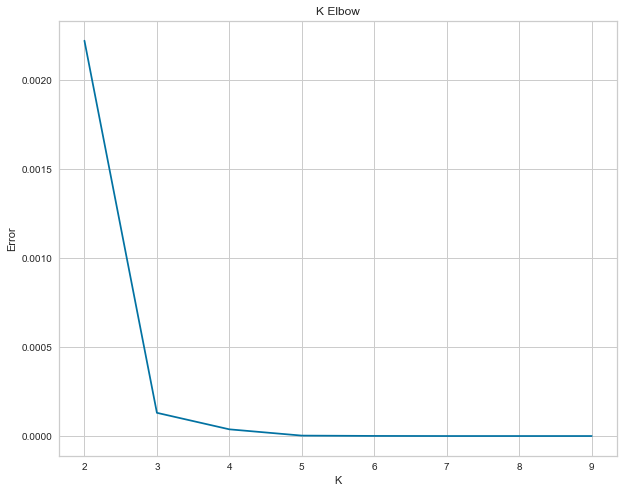

In [74]:

plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 10), y=scores, color='b')
plt.title("K Elbow")
plt.xticks(range(2, 10))
plt.xlabel("K")
plt.ylabel("Error")

In [38]:
!pip install yellowbrick

You should consider upgrading via the 'c:\users\axew2\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [39]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\axew2\AppData\Local\Programs\Python\Python37\lib\site-packages\yellowbrick\cluster\elbow.py:312: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\Users\axew2\AppData\Local\Programs\Python\Python37\lib\site-packages\yellowbrick\cluster\elbow.py:312: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\Users\axew2\AppData\Local\Programs\Python\Python37\lib\site-packages\yellowbrick\cluster\elbow.py:312: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
C:\Users\axew2\AppData\Local\Programs\Python\Python37\lib\site-packages\yellowbrick\cluster\elbow.py:312: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possib

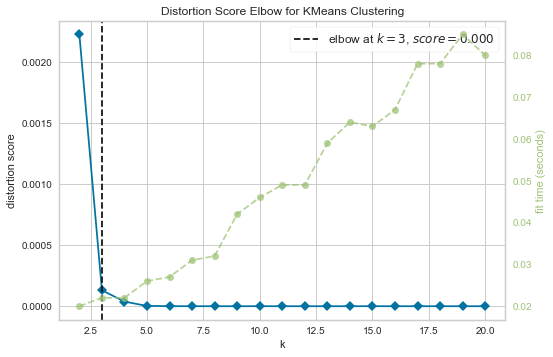

In [40]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

We see that the optimum K value is 3 so we will have a resulting of 3 clusters

In [41]:
kclusters = 3

paris_grouped_clustering = vn_res.drop('Neighbor', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 0, 0, 0, 0, 2, 0, 0, 2])

In [42]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = vn_res.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [43]:
to_merged.head()

,Neighbor,Vietnamese Restaurant,Cluster Labels
0,Batignolles-Monceau,0.029851,2
1,Bourse,0.000000,0
2,Butte-Montmartre,0.000000,0
3,Buttes-Chaumont,0.000000,0
4,Entrepôt,0.000000,0


In [44]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(borough_venues.set_index("Neighborhood"), on="Neighbor")

print(to_merged.shape)
to_merged.head()

(1248, 9)


,Neighbor,Vietnamese Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Monsieur Antoine,48.860365,2.378295,Cocktail Bar
0,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Chez Aline,48.857042,2.378640,Sandwich Place
0,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Le Servan,48.861063,2.381244,Bistro
0,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Broken Biscuits,48.859792,2.378764,Pastry Shop
0,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Ethiopia,48.860833,2.380000,Ethiopian Restaurant


In [45]:
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.head()

,Neighbor,Vietnamese Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Observatoire,0.01,0,48.8771635173,2.33745754348,Isana,48.876442,2.338626,Latin American Restaurant
12,Palais-Bourbon,0.00,0,48.887326522,2.30677699057,Pizzeria d'Ampère,48.885210,2.306645,Italian Restaurant
12,Palais-Bourbon,0.00,0,48.887326522,2.30677699057,Fratelli,48.884824,2.307728,Italian Restaurant
12,Palais-Bourbon,0.00,0,48.887326522,2.30677699057,Garnett,48.884510,2.309700,Burger Joint
12,Palais-Bourbon,0.00,0,48.887326522,2.30677699057,Gontran Cherrier,48.888039,2.305820,Bakery


Count how many Vietnamese Restaurant are there

In [46]:
to_merged['Venue Category'].value_counts()['Vietnamese Restaurant']

22

There are 22 Vietnamese Restaurant in Paris. So now we visualize each Cluster

In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighbor'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

# Now we see in each cluster. How many neighbor are the in each cluster

In [48]:
vn_res["Cluster Labels"] = kmeans.labels_
vn_res.head()

C:\Users\axew2\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Neighbor,Vietnamese Restaurant,Cluster Labels
0,Batignolles-Monceau,0.029851,2
1,Bourse,0.000000,0
2,Butte-Montmartre,0.000000,0
3,Buttes-Chaumont,0.000000,0
4,Entrepôt,0.000000,0


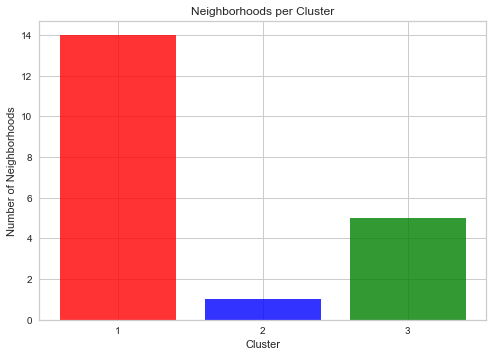

In [75]:
objects = (1,2,3)
y_pos = np.arange(len(objects))
performance = vn_res['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'blue','green'])
plt.xticks(y_pos, objects)
plt.ylabel('Number of Neighborhoods')
plt.xlabel('Cluster')
plt.title('Neighborhoods per Cluster')

plt.show()

In [50]:
vn_res['Cluster Labels'].value_counts()

0    14
2     5
1     1
Name: Cluster Labels, dtype: int64

# Analysis of each cluster

## Cluster 1

In [51]:
cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
cluster1 = pd.merge(cluster1,paris_data, on ='Neighbor')
cluster1.sort_values(['Vietnamese Restaurant'], ascending = False).head()

,Neighbor,Vietnamese Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Arrondissement,Area,Population,Density,Latitude,Longitude
0,Observatoire,0.01,0,48.8771635173,2.33745754348,Isana,48.876442,2.338626,Latin American Restaurant,14th (XIVe) L,5.62,"136,941",24.280,48.8771635173,2.33745754348
64,Observatoire,0.01,0,48.8771635173,2.33745754348,Lalà - La Lasagneria,48.881026,2.334610,Italian Restaurant,14th (XIVe) L,5.62,"136,941",24.280,48.8771635173,2.33745754348
74,Observatoire,0.01,0,48.8771635173,2.33745754348,Caillebotte,48.877118,2.340604,French Restaurant,14th (XIVe) L,5.62,"136,941",24.280,48.8771635173,2.33745754348
73,Observatoire,0.01,0,48.8771635173,2.33745754348,Qee,48.875549,2.336090,Gym / Fitness Center,14th (XIVe) L,5.62,"136,941",24.280,48.8771635173,2.33745754348
72,Observatoire,0.01,0,48.8771635173,2.33745754348,Les Saisons,48.876661,2.340132,French Restaurant,14th (XIVe) L,5.62,"136,941",24.280,48.8771635173,2.33745754348


In [52]:
cluster1['Density'] = cluster1['Density'].astype(float)

In [53]:
cluster1.sort_values(['Density'], ascending = False)

,Neighbor,Vietnamese Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Arrondissement,Area,Population,Density,Latitude,Longitude
507,Popincourt,0.00,0,48.8603921054,2.26197078836,Le Chalet des Îles,48.863384,2.260407,French Restaurant,11th (XIe) R,3.66,"147,470",40.1830,48.8603921054,2.26197078836
512,Popincourt,0.00,0,48.8603921054,2.26197078836,"Arrêt Porte de Passy [PC,32]",48.857496,2.264828,Bus Stop,11th (XIe) R,3.66,"147,470",40.1830,48.8603921054,2.26197078836
517,Popincourt,0.00,0,48.8603921054,2.26197078836,Lac Supérieur,48.858089,2.256641,Lake,11th (XIe) R,3.66,"147,470",40.1830,48.8603921054,2.26197078836
515,Popincourt,0.00,0,48.8603921054,2.26197078836,Le Château D'Ingres,48.856938,2.264810,Plaza,11th (XIe) R,3.66,"147,470",40.1830,48.8603921054,2.26197078836
514,Popincourt,0.00,0,48.8603921054,2.26197078836,Lac Inférieur,48.863896,2.261209,Lake,11th (XIe) R,3.66,"147,470",40.1830,48.8603921054,2.26197078836
513,Popincourt,0.00,0,48.8603921054,2.26197078836,Piscine d'Auteuil,48.856986,2.260979,Pool,11th (XIe) R,3.66,"147,470",40.1830,48.8603921054,2.26197078836
516,Popincourt,0.00,0,48.8603921054,2.26197078836,Arrêt Porte de la Muette [63],48.861747,2.267912,Bus Station,11th (XIe) R,3.66,"147,470",40.1830,48.8603921054,2.26197078836
511,Popincourt,0.00,0,48.8603921054,2.26197078836,Bateau du Chalet des Îles,48.863361,2.260417,Boat or Ferry,11th (XIe) R,3.66,"147,470",40.1830,48.8603921054,2.26197078836
510,Popincourt,0.00,0,48.8603921054,2.26197078836,Petite Ceinture du XVIe,48.859096,2.263699,Park,11th (XIe) R,3.66,"147,470",40.1830,48.8603921054,2.26197078836
509,Popincourt,0.00,0,48.8603921054,2.26197078836,Porte de Passy,48.857523,2.264178,Plaza,11th (XIe) R,3.66,"147,470",40.1830,48.8603921054,2.26197078836


In [54]:
cluster1['Vietnamese Restaurant'].mean()

0.0011574074074074071

In [55]:
len(cluster1['Venue'].unique())

830

In [56]:
len(cluster1[cluster1['Venue Category'] == 'Vietnamese Restaurant'])

1

## Cluster 2

In [57]:
# Blue
cluster2=to_merged.loc[to_merged['Cluster Labels'] == 1]
cluster2 = pd.merge(cluster2,paris_data, on ='Neighbor')
cluster2.sort_values(['Vietnamese Restaurant'], ascending = False).head()

,Neighbor,Vietnamese Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Arrondissement,Area,Population,Density,Latitude,Longitude
0,Temple,0.216667,1,48.8283880317,2.36227244042,Hoi An,48.825417,2.361104,Vietnamese Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
1,Temple,0.216667,1,48.8283880317,2.36227244042,Lao Thai,48.826171,2.359044,Thai Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
32,Temple,0.216667,1,48.8283880317,2.36227244042,Ny Hav,48.824864,2.360843,Asian Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
33,Temple,0.216667,1,48.8283880317,2.36227244042,La Terrasse d'Italie,48.828998,2.356308,Italian Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
34,Temple,0.216667,1,48.8283880317,2.36227244042,Le Café Canon,48.826291,2.356901,French Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042


In [58]:
cluster2['Density'] = cluster2['Density'].astype(float)

In [68]:
cluster2.sort_values(['Density'], ascending = False)

,Neighbor,Vietnamese Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Arrondissement,Area,Population,Density,Latitude,Longitude
0,Temple,0.216667,1,48.8283880317,2.36227244042,Hoi An,48.825417,2.361104,Vietnamese Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
1,Temple,0.216667,1,48.8283880317,2.36227244042,Lao Thai,48.826171,2.359044,Thai Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
32,Temple,0.216667,1,48.8283880317,2.36227244042,Ny Hav,48.824864,2.360843,Asian Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
33,Temple,0.216667,1,48.8283880317,2.36227244042,La Terrasse d'Italie,48.828998,2.356308,Italian Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
34,Temple,0.216667,1,48.8283880317,2.36227244042,Le Café Canon,48.826291,2.356901,French Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
35,Temple,0.216667,1,48.8283880317,2.36227244042,Ang Traiteur,48.824113,2.364249,Butcher,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
36,Temple,0.216667,1,48.8283880317,2.36227244042,Le Bambou,48.825139,2.362590,Asian Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
37,Temple,0.216667,1,48.8283880317,2.36227244042,Ba Mien,48.829967,2.357213,Vietnamese Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
38,Temple,0.216667,1,48.8283880317,2.36227244042,Jardin d'Asie,48.824784,2.362040,Asian Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042
39,Temple,0.216667,1,48.8283880317,2.36227244042,Tian Tian Wang,48.824529,2.362396,Chinese Restaurant,3rd (IIIe) RAdministratively part of Paris Centre,5.59,"100,196",17.924,48.8283880317,2.36227244042


In [60]:
cluster2['Vietnamese Restaurant'].mean()

0.21666666666666673

In [61]:
len(cluster2[cluster2['Venue Category'] == 'Vietnamese Restaurant'])

13

## Cluster 3

In [69]:
# Blue
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
cluster3 = pd.merge(cluster3,paris_data, on ='Neighbor')
cluster3.sort_values(['Vietnamese Restaurant'], ascending = False)

,Neighbor,Vietnamese Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Arrondissement,Area,Population,Density,Latitude,Longitude
118,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Pâtisserie Emma Duvéré,48.856969,2.374558,Pastry Shop,17th (XVIIe) R,5.66,"168,737",29.760,48.8590592213,2.3800583082
110,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Les Furieux,48.855881,2.375365,Beer Garden,17th (XVIIe) R,5.66,"168,737",29.760,48.8590592213,2.3800583082
104,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Akashi Sushi,48.856329,2.376256,Japanese Restaurant,17th (XVIIe) R,5.66,"168,737",29.760,48.8590592213,2.3800583082
105,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Pancake Sisters,48.857250,2.377492,Breakfast Spot,17th (XVIIe) R,5.66,"168,737",29.760,48.8590592213,2.3800583082
106,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Bombolo,48.856463,2.378033,Pizza Place,17th (XVIIe) R,5.66,"168,737",29.760,48.8590592213,2.3800583082
107,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Carrefour City,48.856120,2.375980,Supermarket,17th (XVIIe) R,5.66,"168,737",29.760,48.8590592213,2.3800583082
108,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Carrefour City,48.855986,2.376068,Supermarket,17th (XVIIe) R,5.66,"168,737",29.760,48.8590592213,2.3800583082
109,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Carrefour City,48.862442,2.376392,Supermarket,17th (XVIIe) R,5.66,"168,737",29.760,48.8590592213,2.3800583082
111,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,l'alimentation générale,48.859641,2.378320,Nightclub,17th (XVIIe) R,5.66,"168,737",29.760,48.8590592213,2.3800583082
121,Batignolles-Monceau,0.029851,2,48.8590592213,2.3800583082,Come a Casa,48.858585,2.382223,Italian Restaurant,17th (XVIIe) R,5.66,"168,737",29.760,48.8590592213,2.3800583082


In [63]:
cluster3['Density'] = cluster3['Density'].astype(float)

In [64]:
cluster3.sort_values(['Density'], ascending = False).head()

,Neighbor,Vietnamese Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Arrondissement,Area,Population,Density,Latitude,Longitude
235,Ménilmontant,0.022222,2,48.8870759966,2.38482096015,Picard,48.885023,2.380398,Food & Drink Shop,20th (XXe) R,5.98,"191,800",32.052,48.8870759966,2.38482096015
201,Ménilmontant,0.022222,2,48.8870759966,2.38482096015,L'Atalante,48.889827,2.382824,Beer Bar,20th (XXe) R,5.98,"191,800",32.052,48.8870759966,2.38482096015
211,Ménilmontant,0.022222,2,48.8870759966,2.38482096015,La Cantine Bretonne,48.889279,2.383899,Creperie,20th (XXe) R,5.98,"191,800",32.052,48.8870759966,2.38482096015
210,Ménilmontant,0.022222,2,48.8870759966,2.38482096015,Yoshida,48.887333,2.387491,Japanese Restaurant,20th (XXe) R,5.98,"191,800",32.052,48.8870759966,2.38482096015
209,Ménilmontant,0.022222,2,48.8870759966,2.38482096015,TonTon Jaurès,48.887588,2.389259,French Restaurant,20th (XXe) R,5.98,"191,800",32.052,48.8870759966,2.38482096015


In [65]:
cluster3['Vietnamese Restaurant'].mean()

0.024691358024691357

In [66]:
len(cluster3[cluster3['Venue Category'] == 'Vietnamese Restaurant'])

8

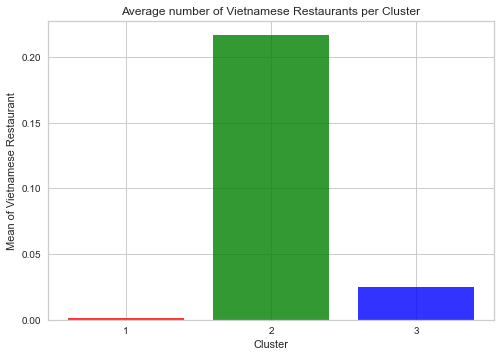

In [76]:
clusters_mean = [cluster1['Vietnamese Restaurant'].mean(),cluster2['Vietnamese Restaurant'].mean(),
                 cluster3['Vietnamese Restaurant'].mean()]
objects = (1,2,3)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'green','blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean of Vietnamese Restaurant')
plt.xlabel('Cluster')
plt.title('Average number of Vietnamese Restaurants per Cluster')

plt.show()

# Result

We can see that, the cluster 2 which only 1 neighrbor (Temple) is has the highest average number of Vietnamese Restaurants. In another hand, cluster 1 which has huge amount of neighborhood but there is quiet little Vietnamese Restaurant. We see that in the 20th Arrondissement (cluster 3) has the second last average of Vietnamese Restaurant. Looking at the analysis table, the best place to open a Vietnamese Restaurant is in Popincourt (11th Arrondissement). Because there is no Vietnamese Restaurant which eliminating the competition and the Density of it is 40.183 inhabitants per km^2 known as the highest density in Paris. The second best choice that have a great oppurtunity would be in area such as Ménilmontant in 20th Arrondissement (Cluster 3) and the Density quiet large (32.052). Because there is little Vietnamese Restaurant in that place, we can survey why they open Vietnamese Restaurant. What Vietnamese food they are selling ? So in conclude, if the your food is good taste, the survice is excellent and have a stragegy. Your restaurant could be open everywhere.